<a href="https://colab.research.google.com/github/gunjan7858903606/project/blob/main/hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HOTEL BOOKING PROJECT**

# **About Dataset**

Context This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were canceled.

# New section

# Content

Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted. Four Columns, 'name', 'email', 'phone number' and 'credit_card' have been artificially created and added to the dataset.

# **Acknowledgements**

The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mojtaba142/hotel-booking")

print("Path to dataset files:", path)

100%|██████████| 4.40M/4.40M [00:00<00:00, 101MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mojtaba142/hotel-booking/versions/1


# **Research Question ❓**

1.What are the variables that effect hotel reservation cancellations?

2.How can we make hotel reservations cancellation better?

**3.How all hotels be assisted in making pricing and promotional decisions?**

# **Hypothesis 🧪**

More cancellations occur when prices are higher.

When there is a longer waiting list. Customers tend to cancel more frequently.

### The majority of clients are coming from offline travel agents to make their reservations.

# **Library import**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Loading the Dataset 📁 bold text

In [3]:
df=pd.read_csv("/content/hotel_booking.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# **2) Data Checks to Perform**

Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of the dataset

Check various categories present in the different categorical columns

# **3️) Exploratory Data Analysis 📊**

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [5]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
19750,Resort Hotel,0,112,2015,December,53,30,0,3,2,...,Transient-Party,237.33,0,0,Check-Out,2016-01-02,Bobby Buckley,Bobby.B60@outlook.com,159-279-9982,************2180
19751,Resort Hotel,0,112,2015,December,53,30,0,3,1,...,Transient-Party,168.67,0,0,Check-Out,2016-01-02,Stephen Rose,SRose@hotmail.com,696-539-6345,************9489
19752,Resort Hotel,0,112,2015,December,53,30,0,3,2,...,Transient-Party,224.67,0,0,Check-Out,2016-01-02,Michelle Sampson,Michelle.Sampson@mail.com,324-763-6169,************8832
19753,Resort Hotel,0,112,2015,December,53,30,0,3,2,...,Transient-Party,224.67,0,0,Check-Out,2016-01-02,Sarah Flores,Flores.Sarah@mail.com,511-546-9893,************1913
19754,Resort Hotel,0,112,2015,December,53,30,0,3,2,...,Transient-Party,224.67,0,0,Check-,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(19755, 36)

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19755 entries, 0 to 19754
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           19755 non-null  object 
 1   is_canceled                     19755 non-null  int64  
 2   lead_time                       19755 non-null  int64  
 3   arrival_date_year               19755 non-null  int64  
 4   arrival_date_month              19755 non-null  object 
 5   arrival_date_week_number        19755 non-null  int64  
 6   arrival_date_day_of_month       19755 non-null  int64  
 7   stays_in_weekend_nights         19755 non-null  int64  
 8   stays_in_week_nights            19755 non-null  int64  
 9   adults                          19755 non-null  int64  
 10  children                        19755 non-null  float64
 11  babies                          19755 non-null  int64  
 12  meal                            

In [9]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19755 entries, 0 to 19754
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           19755 non-null  object        
 1   is_canceled                     19755 non-null  int64         
 2   lead_time                       19755 non-null  int64         
 3   arrival_date_year               19755 non-null  int64         
 4   arrival_date_month              19755 non-null  object        
 5   arrival_date_week_number        19755 non-null  int64         
 6   arrival_date_day_of_month       19755 non-null  int64         
 7   stays_in_weekend_nights         19755 non-null  int64         
 8   stays_in_week_nights            19755 non-null  int64         
 9   adults                          19755 non-null  int64         
 10  children                        19755 non-null  float64       
 11  ba

In [11]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,19755,19755,19755,19303,19755,19755,19755,19755,19755,19755,19755,19754,19754,19754,19754
unique,1,12,5,94,6,4,10,11,3,4,4,17768,19646,19754,7986
top,Resort Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled,John Smith,JMiller@gmail.com,511-546-9893,************5289
freq,19755,2771,14190,10847,8847,14482,12066,9481,17970,15249,10801,11,3,1,10


In [12]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA']
--------------------------------------------------
market_segment
['D

# **4) Data Pre-processing 🛠️**

In [13]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [14]:
df.drop(['company','agent'], axis =1, inplace = True)
df.dropna(inplace =True)

In [15]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [16]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302
mean,0.571702,113.134546,2015.802870,30.804994,15.796653,1.265361,3.331986,1.897834,0.143923,0.011864,0.037250,0.205782,0.164128,0.232359,0.811315,96.894178,0.077090,0.544141,2016-04-04 22:51:17.401305856
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-11-18 00:00:00
25%,0.000000,26.000000,2015.000000,21.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.200000,0.000000,0.000000,2015-10-06 00:00:00
50%,1.000000,86.000000,2016.000000,32.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.000000,0.000000,0.000000,2016-02-09 00:00:00
75%,1.000000,181.000000,2016.000000,41.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.000000,0.000000,1.000000,2016-10-02 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,150.000000,508.000000,2.000000,5.000000,2017-09-06 00:00:00
std,0.494845,101.713510,0.781201,12.995729,8.935825,1.149758,2.463122,0.880172,0.477144,0.110174,0.189379,1.915048,1.139010,0.645127,9.099991,60.765839,0.268098,0.791184,NaN


In [17]:
df = df[df['adr']<5000]

In [18]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302.000000,19302
mean,0.571702,113.134546,2015.802870,30.804994,15.796653,1.265361,3.331986,1.897834,0.143923,0.011864,0.037250,0.205782,0.164128,0.232359,0.811315,96.894178,0.077090,0.544141,2016-04-04 22:51:17.401305856
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-11-18 00:00:00
25%,0.000000,26.000000,2015.000000,21.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.200000,0.000000,0.000000,2015-10-06 00:00:00
50%,1.000000,86.000000,2016.000000,32.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.000000,0.000000,0.000000,2016-02-09 00:00:00
75%,1.000000,181.000000,2016.000000,41.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.000000,0.000000,1.000000,2016-10-02 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,150.000000,508.000000,2.000000,5.000000,2017-09-06 00:00:00
std,0.494845,101.713510,0.781201,12.995729,8.935825,1.149758,2.463122,0.880172,0.477144,0.110174,0.189379,1.915048,1.139010,0.645127,9.099991,60.765839,0.268098,0.791184,NaN


# **5) Data Analysis and Visualization 🛠️**

is_canceled
1    0.571702
0    0.428298
Name: proportion, dtype: float64


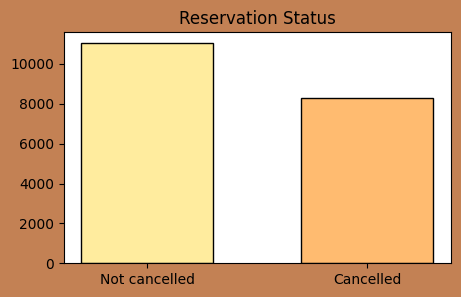

In [19]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)
colors = sns.color_palette(["#FFEC9E", "#FFBB70"])

plt.figure(figsize = (5,3),facecolor="#C38154")
plt.title('Reservation Status')
plt.bar(['Not cancelled' , 'Cancelled'],df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.6,color=colors)
plt.show()

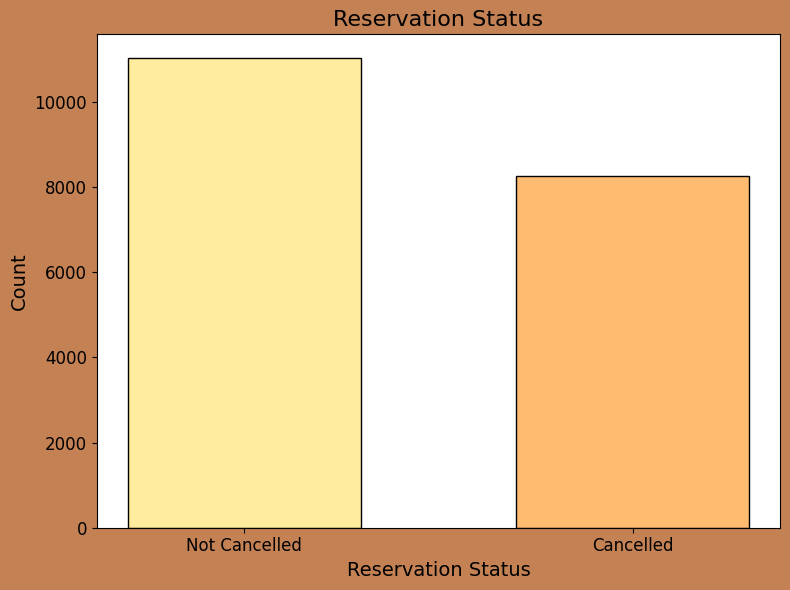

In [20]:
# Calculate cancellation percentages
cancelled_perc = df['is_canceled'].value_counts(normalize=True)

# Define color palette
colors = sns.color_palette(["#FFEC9E", "#FFBB70"])

# Plot
plt.figure(figsize=(8, 6), facecolor='#C38154')  # Set background color to light gray
plt.title('Reservation Status', fontsize=16, color='Black')
plt.bar(['Not Cancelled', 'Cancelled'], df['is_canceled'].value_counts(), edgecolor='black', width=0.6, color=colors)
plt.xlabel('Reservation Status', fontsize=14, color='Black')
plt.ylabel('Count', fontsize=14, color='Black')
plt.xticks(fontsize=12, color='Black')
plt.yticks(fontsize=12, color='Black')
plt.tight_layout()
plt.savefig('reservation_status_plot.png', bbox_inches='tight', transparent=True)
plt.show()

# The provided bar graph illustrates the cancellation and non-cancellation percentages for reservations. It is evident that a substantial portion of reservations remains unaffected by cancellations. Notably, 37% of clients have chosen to cancel their reservations, and this has a noteworthy impact on the hotels' revenue.**italicised text**

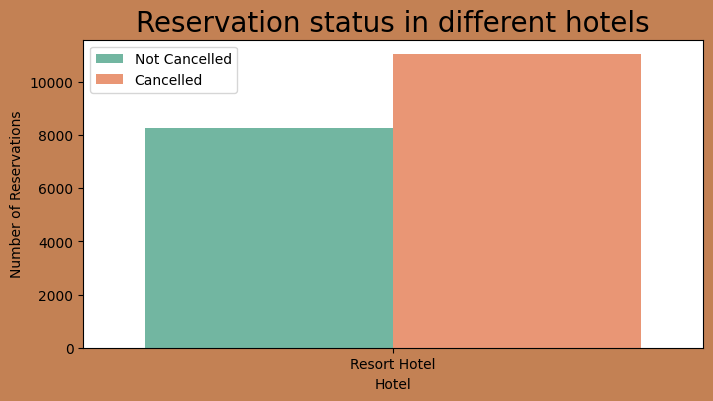

In [21]:
# Set the background color of the figure
plt.figure(figsize=(8, 4), facecolor='#C38154')

# Create the countplot
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette="Set2")

# Customize legend location
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))

# Set plot title and axis labels
plt.title('Reservation status in different hotels', size=20, color='Black')
plt.xlabel('Hotel',color='Black')
plt.ylabel('Number of Reservations', color='Black')

# Customize legend labels
plt.legend(['Not Cancelled', 'Cancelled'])

# Show the plot
plt.show()

# In comparison to resort hotels, city hotels have more bookings. Its possible that resort hotels are more expensive that those in cities.

In [22]:
#checking the graph cancelation rate in percentage for Resort Hotel
resort_hotel= df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

,proportion
is_canceled,
1,0.571702
0,0.428298


In [23]:
# checking the Above graph Cancellation rate in percentage for City Hotel
City_Hotel = df[df['hotel']== 'City Hotel']
City_Hotel['is_canceled'].value_counts(normalize =True)

,proportion
is_canceled,


In [26]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = City_Hotel.groupby('reservation_status_date')[['adr']].mean()

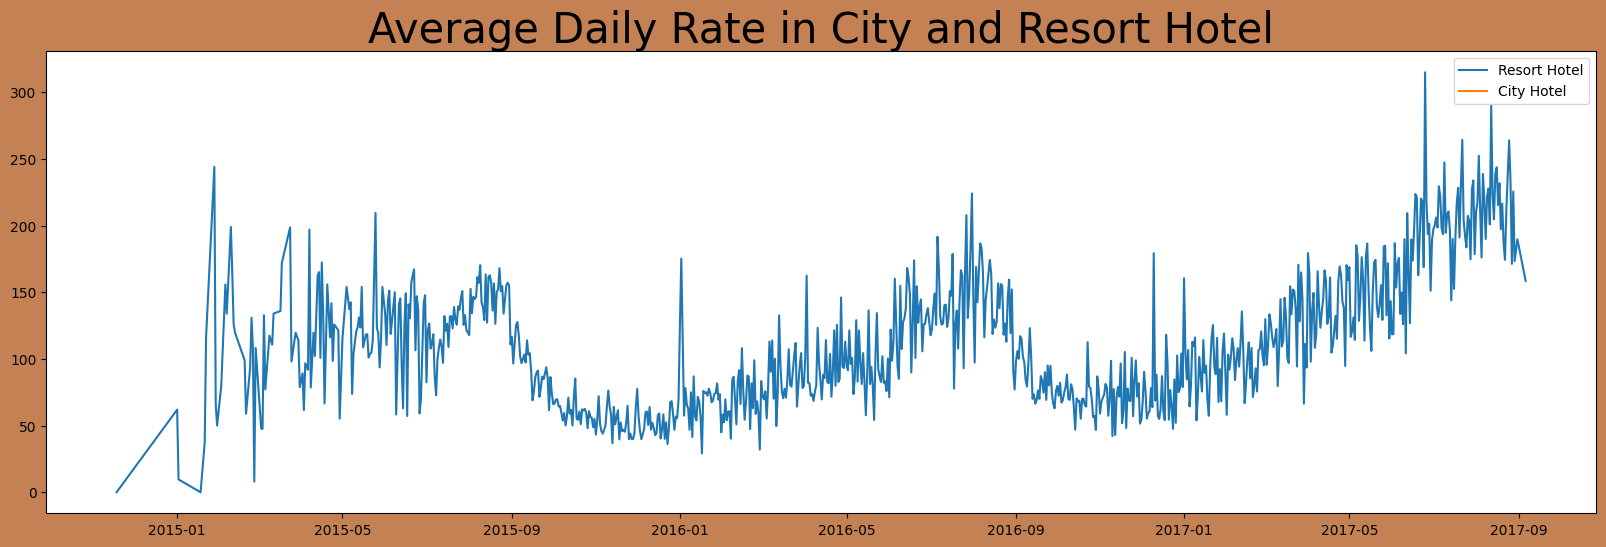

In [27]:
plt.figure(figsize=(20,6), facecolor='#C38154')
plt.title('Average Daily Rate in City and Resort Hotel', fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label = 'Resort Hotel')
plt.plot(City_Hotel.index,City_Hotel['adr'],label = 'City Hotel')
plt.legend(fontsize=10)
plt.show()

The line graph above shows that, on certain days the average daily rate for a city hotel is less than that of a resort hotel and on other days, it is even less.
## **It goes without saying that weekends and holidays may see a rise in resort hotel rates.**

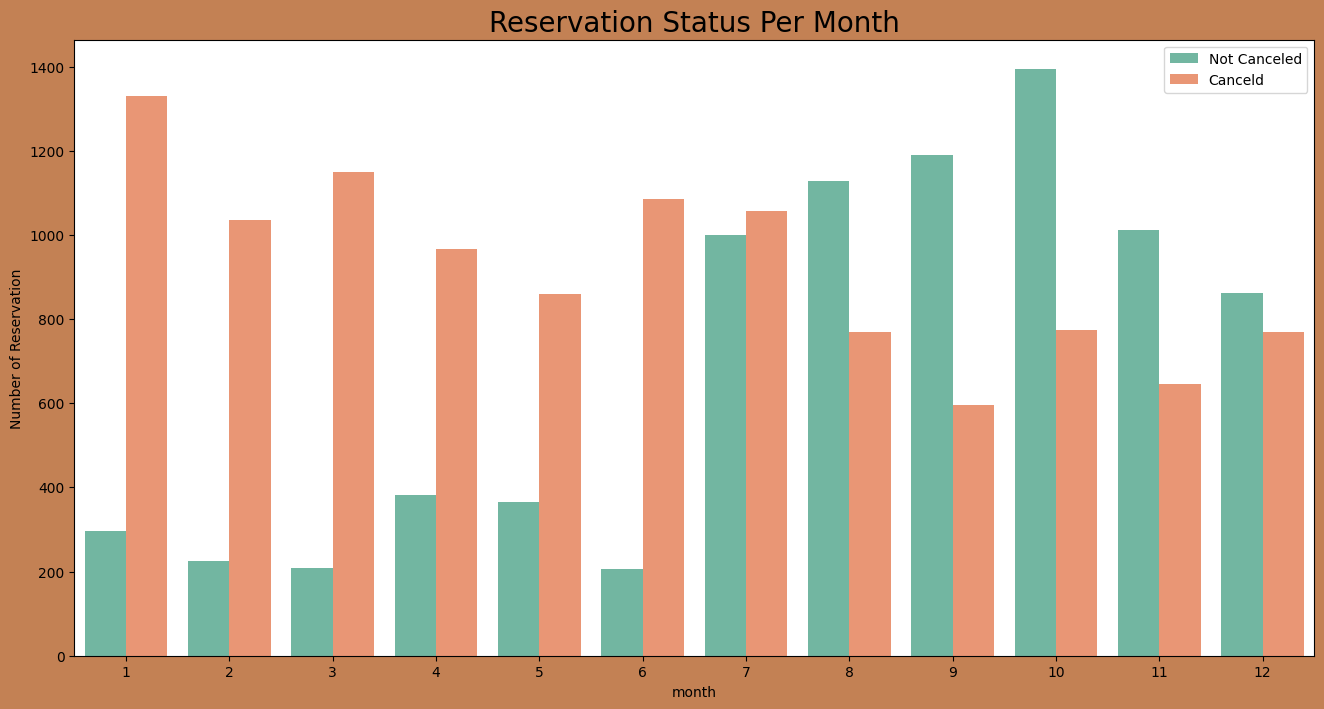

In [28]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8), facecolor='#C38154')
ax1 = sns.countplot(x='month', hue='is_canceled', data= df, palette = 'Set2')
legend_lebels,_ = ax1.get_legend_handles_labels()
plt.title('Reservation Status Per Month', size = 20)
plt.xlabel('month')
plt.ylabel('Number of Reservation')
plt.legend(['Not Canceled','Canceld'])
plt.show()

In [30]:
df['adr']

,adr
0,0.00
1,0.00
2,75.00
3,75.00
4,98.00
...,...
19749,224.67
19750,237.33
19751,168.67
19752,224.67


<ipython-input-31-f10d457d4ef6>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize = 20)


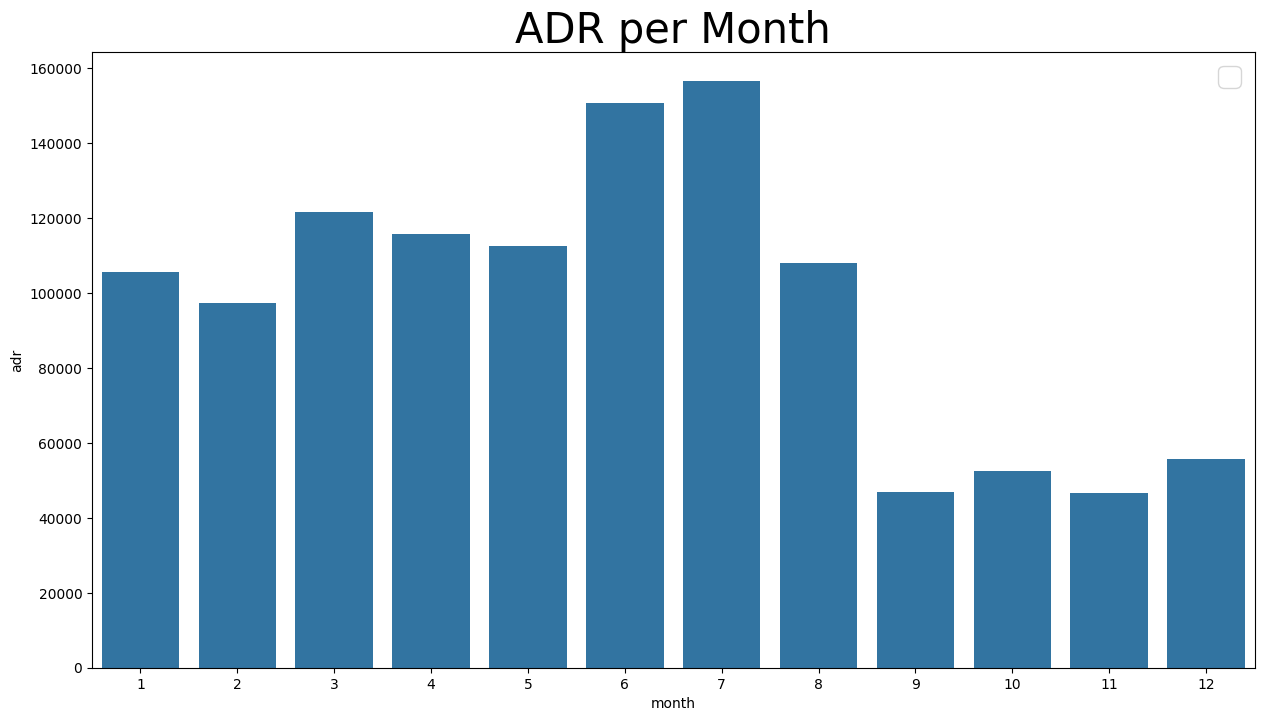

In [31]:
plt.figure(figsize = (15,8))
plt.title('ADR per Month', fontsize = 30)
#data =df[df['is_canceled'] == 1].groupby('month')['adr'].sum().reset_index()

data = df[df['is_canceled'] == 1].groupby('month')['adr'].sum().reset_index()
sns.barplot(x='month', y='adr', data = data )
plt.legend(fontsize = 20)
plt.show()

This bar graph illustrates that cancellations are most frequent when prices are at their highest and least common when prices are at their lowest. Consequently, the price of accommodation appears to be the primary factor influencing cancellations. Now, let's examine which country experiences the highest number of canceled reservations. Portugal stands out as the top country with the highest number of cancellations.

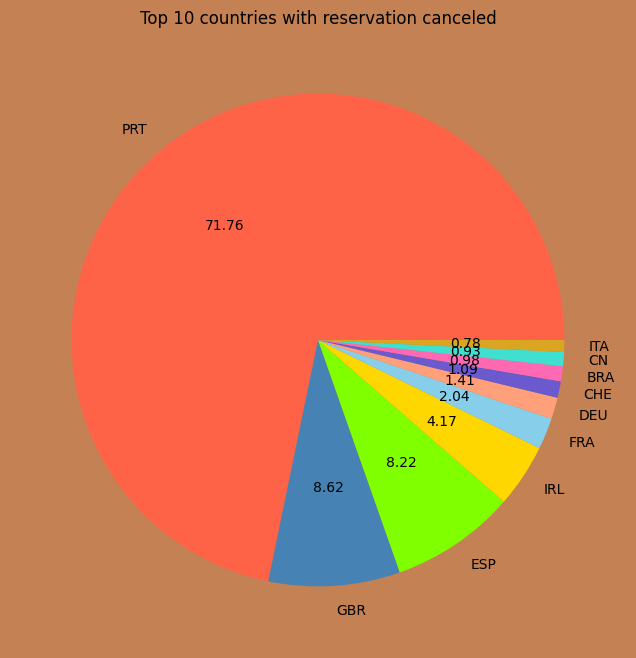

In [32]:
cancelled_data= df[df['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]
# plt.figure(figsize=(8,8), facecolor='#C38154')
# plt.title('Top 10 countries with reservation canceled',color="black")
# plt.pie(top_10_country, autopct ='%.2f', labels = top_10_country.index)
# plt.show()

# Custom colors for the pie chart
custom_colors = ['#FF6347', '#4682B4', '#7FFF00', '#FFD700', '#87CEEB', '#FFA07A', '#6A5ACD', '#FF69B4', '#40E0D0', '#DAA520']

plt.figure(figsize=(8, 8), facecolor='#C38154')  # Set background color to a light brown
plt.title('Top 10 countries with reservation canceled', color
          ="black")
plt.pie(top_10_country, autopct='%.2f', labels=top_10_country.index, colors=custom_colors)
plt.show()

Let's analyze the sources from which guests are making hotel reservations, including Direct, Groups, Online Travel Agencies, and Offline Travel Agents. Approximately 46% of clients make reservations through online travel agencies, while 27% come through group bookings.

# A mere 4% of clients choose to book hotels directly by visiting them in person and making reservations

In [33]:
df['market_segment'].value_counts()

,count
market_segment,
Online TA,8773
Groups,3750
Offline TA/TO,3248
Direct,2297
Corporate,1160
Complementary,74


In [34]:
df['market_segment'].value_counts(normalize=True)

,proportion
market_segment,
Online TA,0.454512
Groups,0.194280
Offline TA/TO,0.168273
Direct,0.119003
Corporate,0.060097
Complementary,0.003834


In [35]:
cancelled_data['market_segment'].value_counts(normalize=True)

,proportion
market_segment,
Online TA,0.565473
Groups,0.224014
Offline TA/TO,0.101223
Direct,0.077118
Corporate,0.029180
Complementary,0.002990


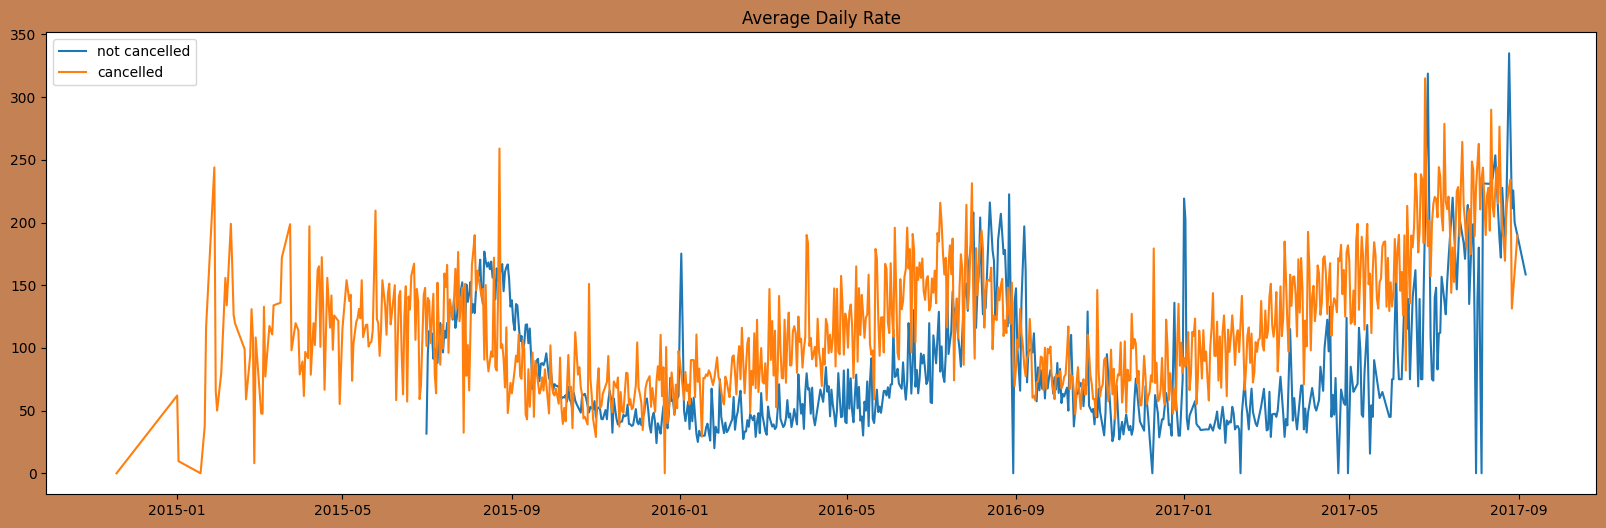

In [36]:
cancelled_df_adr= cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

not_cancelled_data=df[df['is_canceled']==0]
not_cancelled_df_adr= not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize=(20,6), facecolor='#C38154')
plt.title('Average Daily Rate', color="Black")
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend()
plt.show()

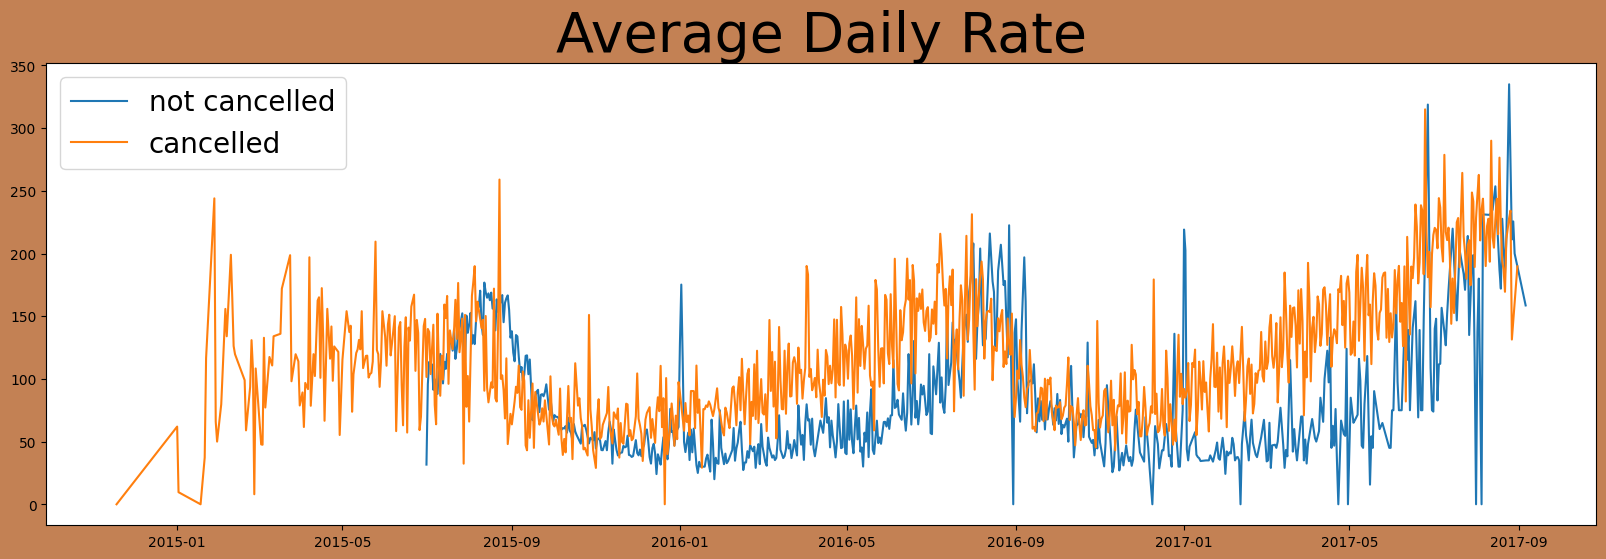

In [37]:
plt.figure(figsize=(20,6), facecolor='#C38154')
plt.title('Average Daily Rate', fontsize = 40)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend(fontsize = 20)
plt.show()

As seen in the graph, reservations are canceled when the average daily rate is higher than when it is not canceled. It clearly proves all the above analysis that the higher price leads to higher cancellation.

italicized text

# **Suggestions:**

1.Increasing prices are associated with a higher rate of cancellations. To mitigate reservation cancellations, hotels could refine their pricing strategies by offering reduced rates for specific locations and providing discounts to customers.

2.The resort hotel experiences a higher ratio of cancellations compared to the city hotels. Therefore, hotels should consider offering competitive room price discounts on weekends and holidays.

3.During the month of January, hotels can launch marketing campaigns with attractive offers to boost their revenue, especially since cancellations tend to peak during this period.

4.Enhancing the quality of hotels and their services, particularly in Portugal, can be an effective approach

# **The End 🤝🎉🤝🎉**

:link text this is my note book link

Thanku for Reading my notebook